# Problem 2: Maximizing Profit with Limited Budget

## Algorithmic Strategy: Dynamic Programming (0/1 Knapsack)
## Application Domain: Investment & Budget Planning

## Problem Description
Choose a subset of projects or items that give maximum profit within a limited budget.

In [ ]:
!pip install memory-profiler

## Step 1: Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import profile
import time

## Step 2: Input Data

In [ ]:
projects = [
    ('P1', 10, 15),
    ('P2', 20, 25),
    ('P3', 30, 40),
    ('P4', 25, 30),
    ('P5', 15, 18),
    ('P6', 12, 20)
]

In [ ]:
budget = 50  # Total investment budget in lakhs

print("Available Projects (ID, Cost, Profit):")
for p in projects:
    print(p)
print("\nTotal Budget Available: ₹", budget, "lakhs")

Available Projects (ID, Cost, Profit):
('P1', 10, 15)
('P2', 20, 25)
('P3', 30, 40)
('P4', 25, 30)
('P5', 15, 18)
('P6', 12, 20)

Total Budget Available: ₹ 50 lakhs


## Step 3: Dynamic Programming Function (0/1 Knapsack)

In [ ]:
def maximize_profit(projects, budget):
    n = len(projects)
    cost = [p[1] for p in projects]
    profit = [p[2] for p in projects]

    # Step 3.1: Create DP table
    dp = np.zeros((n + 1, budget + 1), dtype=int)

    # Step 3.2: Fill the DP table
    for i in range(1, n + 1):
        for w in range(1, budget + 1):
            if cost[i - 1] <= w:
                dp[i][w] = max(profit[i - 1] + dp[i - 1][w - cost[i - 1]], dp[i - 1][w])
            else:
                dp[i][w] = dp[i - 1][w]

    # Step 3.3: Backtrack to find selected projects
    selected_projects = []
    w = budget
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected_projects.append(projects[i - 1][0])
            w -= cost[i - 1]

    selected_projects.reverse()
    return dp[n][budget], selected_projects

## Step 4: Execution & Timing

In [ ]:
start_time = time.time()
max_profit, selected_projects = maximize_profit(projects, budget)
end_time = time.time()

## Step 5: Output Results

In [ ]:
print("\nSelected Projects:", selected_projects)
print("Maximum Profit (in lakhs):", max_profit)
print("Execution Time: {:.6f} seconds".format(end_time - start_time))


Selected Projects: ['P2', 'P3']
Maximum Profit (in lakhs): 65
Execution Time: 0.000465 seconds


## Step 6: Visualization — Profit vs. Budget

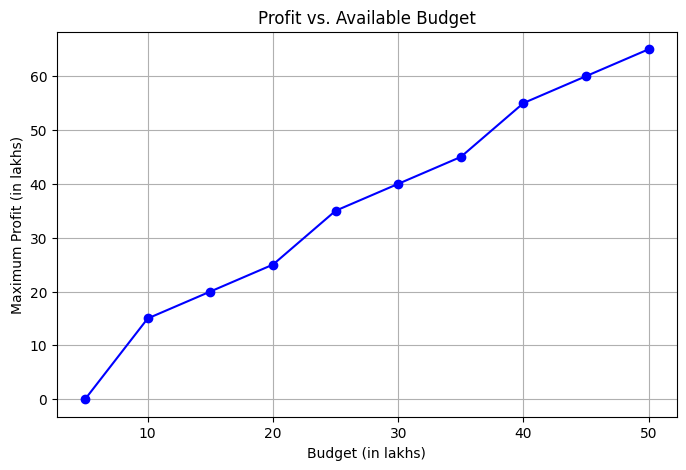

In [ ]:
budgets = list(range(5, budget + 5, 5))
profits = []

for b in budgets:
    p, _ = maximize_profit(projects, b)
    profits.append(p)

plt.figure(figsize=(8, 5))
plt.plot(budgets, profits, marker='o', linestyle='-', color='blue')
plt.title("Profit vs. Available Budget")
plt.xlabel("Budget (in lakhs)")
plt.ylabel("Maximum Profit (in lakhs)")
plt.grid(True)
plt.show()

## Observation

The graph shows that profit increases as the budget increases but eventually flattens out, indicating that after a certain investment level, adding more funds does not yield higher profits. This reflects optimal budget utilization and diminishing returns, proving the efficiency of the dynamic programming approach.

## Step 7: Analysis

In [ ]:
print("\n--- Algorithm Analysis ---")
print("Approach Used: Dynamic Programming (0/1 Knapsack)")
print("Time Complexity: O(n * budget)")
print("Space Complexity: O(n * budget)")
print("Real-world Constraints: Limited capital, varying risk, project dependency, and expected ROI.")


--- Algorithm Analysis ---
Approach Used: Dynamic Programming (0/1 Knapsack)
Time Complexity: O(n * budget)
Space Complexity: O(n * budget)
Real-world Constraints: Limited capital, varying risk, project dependency, and expected ROI.
